# Pornography Classification with Transformers

**Author:** [Mahmoud Taha](https://www.linkedin.com/in/mahmoud-mohammed-21b969a9/)<br>
**Date created:** 2022/07/02<br>
**Description:** Training a video classifier with hybrid transformers.



This example is a follow-up to the
[Video Classification with a CNN-RNN Architecture](https://keras.io/examples/vision/video_classification/)
example. This time, we will be using a Transformer-based model
([Vaswani et al.](https://arxiv.org/abs/1706.03762)) to classify videos. You can follow
[this book chapter](https://livebook.manning.com/book/deep-learning-with-python-second-edition/chapter-11)
in case you need an introduction to Transformers (with code). After reading this
example, you will know how to develop hybrid Transformer-based models for video
classification that operate on CNN feature maps.

This example requires TensorFlow 2.5 or higher, as well as TensorFlow Docs, which can be
installed using the following command:

In [77]:

counting = 0 
for indx , file in enumerate(glob.glob( "/content/drive/MyDrive/eng-mahmoud/dataSet/danbooru2019/images/original/0001" + "/*.avi")):
  counting = counting + 1 

print(counting)
  



0


In [1]:
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
from tensorflow_docs.vis import embed
from tensorflow.keras import layers
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os
import glob
import csv

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Define hyperparameters

In [30]:
MAX_SEQ_LENGTH = 1
NUM_FEATURES = 1024
IMG_SIZE = 128
EPOCHS = 5

batchStart = 0
batchEnd = 200
imageWidth = 128
imageHeight = 128

base_path = '/content/drive/MyDrive/eng-mahmoud/dataSet/danbooru2019/'
images_path = base_path + 'images/'

s = "safe"
e = "explicit"
q = "questionable"

image_info = ['image_name', 'image_rate']
image_dict = []
rates = ["safe" , "questionable" , "explicit"]

test_images = []
test_array = []
train_images = []
train_array = []

try:
  print("rating found: " + str(rating.values[170779]))
except:
  execfile( base_path + 'rating.py')
  print("rating created: " + str(rating.values[170779]))



rating found: 0


## Data collection

As done in the [predecessor](https://keras.io/examples/vision/video_classification/) to
this example, we will be using a subsampled version of the
[Danbooru dataset](https://www.gwern.net/Danbooru2021),
a well-known benchmark dataset. .

## Create test and train image folders


In [8]:

def fileSize(y):
  tmp = 0
  for indx , file in enumerate(glob.glob( images_path + y + "/*.jpg")):
    tmp = tmp + 1 
  print(tmp)

def copyTo(folderName , destName , limit):
  for indx , file in enumerate(glob.glob( images_path + folderName + "/*.jpg")):
    if indx > 0 and indx <= limit:
      !cp {file}  {images_path + destName}  
  print("copytiny " + folderName + " done" , fileSize(destName))

def copier( folder , offSet):
  copyTo('safe' , folder , offSet) 
  copyTo('explicit' , folder , offSet) 
  copyTo('questionable' , folder , offSet) 

# copier('test' , 100)
test_images = [ cv2.imread(file) for indx , file in enumerate(glob.glob( images_path + 'test' + "/*.jpg")) if indx > 0 and indx < 200]
test_array = [ np.resize( img.shape  , (imageWidth , imageHeight , 3 )) for img in test_images ]

# copier('train', 200)
train_images = [ cv2.imread(file) for indx , file in enumerate(glob.glob( images_path + 'train' + "/*.jpg")) if indx > 0 and indx < 200]
train_array = [ np.resize( img.shape  , (imageWidth , imageHeight , 3 )) for img in train_images ]

print(test_array)


[array([[[1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 1000,    3],
        ...,
        [1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 1000,    3]],

       [[1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 1000,    3],
        ...,
        [1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 1000,    3]],

       [[1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 1000,    3],
        ...,
        [1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 1000,    3]],

       ...,

       [[1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 1000,    3],
        ...,
        [1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 1000,    3]],

       [[1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 1000,    3],
        ...,
        [1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 1000,    3]],

       [[1000, 1000,    3],
        [1000, 1000,    3],
        [1000, 

## Create .csv files for test and train images


In [70]:

def createCSV(name):
  for indx , file in enumerate(glob.glob( image_path + name + "/*.jpg")):
    
    fileName = file.split(".")[0].split("/")[-1]
    print(fileName)
    image_dict.append({'image_name' :  fileName , "image_rate" : rates[rating.values[int(fileName)]]})
    print(image_dict[-1])
  
  
  with open( base_path + name + '.csv', 'w') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames = image_info)
      writer.writeheader()
      writer.writerows(image_dict)

createCSV('test')
createCSV('train')


0
170779
{'image_name': '170779', 'image_rate': 'safe'}
1887721
{'image_name': '1887721', 'image_rate': 'safe'}
2998260
{'image_name': '2998260', 'image_rate': 'safe'}
374211
{'image_name': '374211', 'image_rate': 'safe'}
407664
{'image_name': '407664', 'image_rate': 'safe'}
269847
{'image_name': '269847', 'image_rate': 'safe'}
372619
{'image_name': '372619', 'image_rate': 'safe'}
406671
{'image_name': '406671', 'image_rate': 'safe'}
308473
{'image_name': '308473', 'image_rate': 'safe'}
262611
{'image_name': '262611', 'image_rate': 'safe'}
230807
{'image_name': '230807', 'image_rate': 'safe'}
230806
{'image_name': '230806', 'image_rate': 'safe'}
288853
{'image_name': '288853', 'image_rate': 'safe'}
3410467
{'image_name': '3410467', 'image_rate': 'safe'}
3226010
{'image_name': '3226010', 'image_rate': 'safe'}
3141849
{'image_name': '3141849', 'image_rate': 'safe'}
3308315
{'image_name': '3308315', 'image_rate': 'safe'}
3249483
{'image_name': '3249483', 'image_rate': 'safe'}
3285572
{'im

## Data preparation

We will mostly be following the same data preparation steps in this example, except for
the following changes:

* We reduce the image size to 128x128 instead of 224x224 to speed up computation.
* Instead of using a pre-trained [InceptionV3](https://arxiv.org/abs/1512.00567) network,
we use a pre-trained
[DenseNet121](http://openaccess.thecvf.com/content_cvpr_2017/papers/Huang_Densely_Connected_Convolutional_CVPR_2017_paper.pdf)
for feature extraction.
* We directly pad shorter videos to length `MAX_SEQ_LENGTH`.

First, let's load up the
[DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [28]:
train_df = pd.read_csv( base_path + "train.csv")
test_df = pd.read_csv( base_path + "test.csv")

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")

center_crop_layer = layers.CenterCrop(IMG_SIZE, IMG_SIZE)


def crop_center(frame):
    cropped = center_crop_layer(frame[None, ...])
    cropped = cropped.numpy().squeeze()
    return cropped


# Following method is modified from this tutorial:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
def load_video(path, max_frames=0):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center(frame)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)


def build_feature_extractor():
    feature_extractor = keras.applications.DenseNet121(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.densenet.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()


# Label preprocessing with StringLookup.
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(train_df["image_rate"]), mask_token=None
)
print(label_processor.get_vocabulary())


def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["image_name"].values.tolist()
    labels = df["image_rate"].values
    labels = label_processor(labels[..., None]).numpy()

    # `frame_features` are what we will feed to our sequence model.
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, str(path) + ".jpg"))

        # Pad shorter videos.
        if len(frames) < MAX_SEQ_LENGTH:
            diff = MAX_SEQ_LENGTH - len(frames)
            padding = np.zeros((diff, IMG_SIZE, IMG_SIZE, 3))
            frames = np.concatenate(frames, padding)

        frames = frames[None, ...]

        # Initialize placeholder to store the features of the current video.
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                if np.mean(batch[j, :]) > 0.0:
                    temp_frame_features[i, j, :] = feature_extractor.predict(
                        batch[None, j, :]
                    )

                else:
                    temp_frame_features[i, j, :] = 0.0

        frame_features[idx,] = temp_frame_features.squeeze()

    return frame_features, labels


Total videos for training: 894
Total videos for testing: 297
['explicit', 'questionable', 'safe']


Calling `prepare_all_videos()` on `train_df` and `test_df` takes ~20 minutes to
complete. For this reason, to save time, here we download already preprocessed NumPy arrays:

In [12]:
!wget -q https://git.io/JZmf4 -O top5_data_prepared.tar.gz
!tar xf top5_data_prepared.tar.gz

In [14]:
train_data, train_labels = np.load("train_data.npy"), np.load("train_labels.npy")
test_data, test_labels = np.load("test_data.npy"), np.load("test_labels.npy")

print(train_data)
print(f"Frame features in train set: {train_data.shape}")

[[[3.59032536e-04 2.85926228e-03 2.41912436e-03 ... 1.49609735e-02
   1.00750256e+00 5.47335625e+00]
  [3.41884937e-04 3.07082315e-03 2.75482167e-03 ... 0.00000000e+00
   1.24295270e+00 5.15576077e+00]
  [3.47615394e-04 4.05336916e-03 2.35297834e-03 ... 2.94829439e-02
   1.16166830e+00 4.52488089e+00]
  ...
  [4.50318330e-04 3.65969865e-03 1.27880624e-03 ... 7.69495070e-02
   1.75739968e+00 5.41384220e+00]
  [4.56705806e-04 3.63254454e-03 1.10305881e-03 ... 1.97647125e-01
   2.05502129e+00 5.42529202e+00]
  [4.92232502e-04 3.44860880e-03 1.47062284e-03 ... 3.00256699e-01
   1.99165797e+00 4.55454254e+00]]

 [[4.69118793e-04 2.74423184e-03 3.37526388e-03 ... 0.00000000e+00
   8.48583758e-01 5.36682224e+00]
  [4.29538602e-04 2.72381562e-03 3.03163892e-03 ... 0.00000000e+00
   1.08308971e+00 5.25981140e+00]
  [4.31696681e-04 3.44329653e-03 2.89198081e-03 ... 0.00000000e+00
   1.00911355e+00 5.57355881e+00]
  ...
  [3.79825797e-04 4.18832991e-03 1.18354929e-03 ... 2.17517596e-02
   1.87642

In [18]:

train_data, train_labels = prepare_all_videos()
test_data, test_labels = prepare_all_videos()

print(train_data)
print(f"Frame features in train set: {train_data.shape}")


[[[[1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]
   ...
   [1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]]

  [[1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]
   ...
   [1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]]

  [[1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]
   ...
   [1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]]

  ...

  [[1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]
   ...
   [1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]]

  [[1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]
   ...
   [1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]]

  [[1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]
   ...
   [1000 1000    3]
   [1000 1000    3]
   [1000 1000    3]]]


 [[[ 707 1000    3]
   [ 707 1000    3]
   [ 707 1000    3]
   ...
   [ 707 1000    3]
   [ 707 1000    3]
   [ 707 1000    3]]

  [[ 707 1000    3]
   [ 707 1000    3]
   [ 707 1000    3]
   ...
   [ 707 1000    3]
 

In [31]:

train_data, train_labels = prepare_all_videos(train_df , images_path + "train" )
test_data, test_labels = prepare_all_videos(test_df , images_path + "test" )

print(train_data)
print(f"Frame features in train set: {train_data.shape}")


[[[3.1903037e-04 4.7297031e-03 3.4568042e-03 ... 5.2902997e-01
   1.0217042e-01 0.0000000e+00]]

 [[2.0827162e-04 2.6659165e-03 1.1793167e-03 ... 2.6115975e+00
   8.4174991e-01 0.0000000e+00]]

 [[4.8987346e-04 2.6542332e-03 2.5199116e-03 ... 9.7930801e-01
   8.0328363e-01 1.5916821e-01]]

 ...

 [[1.7388046e-04 2.1236928e-03 1.3463779e-03 ... 1.8609183e+00
   0.0000000e+00 2.6287952e-01]]

 [[4.6949237e-04 4.4782455e-03 3.6110731e-03 ... 3.1839406e-01
   5.0038570e-01 5.7036835e-01]]

 [[7.9247628e-05 8.9373924e-03 4.2378221e-04 ... 3.3968240e-01
   4.2476919e-01 2.7788074e+00]]]
Frame features in train set: (894, 1, 1024)


## Building the Transformer-based model

We will be building on top of the code shared in
[this book chapter](https://livebook.manning.com/book/deep-learning-with-python-second-edition/chapter-11) of
[Deep Learning with Python (Second ed.)](https://www.manning.com/books/deep-learning-with-python)
by François Chollet.

First, self-attention layers that form the basic blocks of a Transformer are
order-agnostic. Since videos are ordered sequences of frames, we need our
Transformer model to take into account order information.
We do this via **positional encoding**.
We simply embed the positions of the frames present inside videos with an
[`Embedding` layer](https://keras.io/api/layers/core_layers/embedding). We then
add these positional embeddings to the precomputed CNN feature maps.

In [32]:

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )
        self.sequence_length = sequence_length
        self.output_dim = output_dim

    def call(self, inputs):
        # The inputs are of shape: `(batch_size, frames, num_features)`
        length = tf.shape(inputs)[1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_positions = self.position_embeddings(positions)
        return inputs + embedded_positions

    def compute_mask(self, inputs, mask=None):
        mask = tf.reduce_any(tf.cast(inputs, "bool"), axis=-1)
        return mask


Now, we can create a subclassed layer for the Transformer.

In [33]:

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.3
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation=tf.nn.gelu), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)


## Utility functions for training

In [34]:

def get_compiled_model():
    sequence_length = MAX_SEQ_LENGTH
    embed_dim = NUM_FEATURES
    dense_dim = 4
    num_heads = 1
    classes = len(label_processor.get_vocabulary())

    inputs = keras.Input(shape=(None, None))
    x = PositionalEmbedding(
        sequence_length, embed_dim, name="frame_position_embedding"
    )(inputs)
    x = TransformerEncoder(embed_dim, dense_dim, num_heads, name="transformer_layer")(x)
    x = layers.GlobalMaxPooling1D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs)

    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return model


def run_experiment():
    filepath = "/tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    model = get_compiled_model()
    history = model.fit(
        train_data,
        train_labels,
        validation_split=0.15,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    model.load_weights(filepath)
    _, accuracy = model.evaluate(test_data, test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return model


## Model training and inference

In [35]:
trained_model = run_experiment()

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.2435 - accuracy: 0.4124
Epoch 1: val_loss improved from inf to 2.07819, saving model to /tmp/video_classifier
24/24 [==============================] - 4s 105ms/step - loss: 2.2435 - accuracy: 0.4124 - val_loss: 2.0782 - val_accuracy: 0.0000e+00
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2638 - accuracy: 0.4993
Epoch 2: val_loss improved from 2.07819 to 1.19164, saving model to /tmp/video_classifier
24/24 [==============================] - 2s 99ms/step - loss: 1.2638 - accuracy: 0.4993 - val_loss: 1.1916 - val_accuracy: 0.2444
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1011 - accuracy: 0.5375
Epoch 3: val_loss did not improve from 1.19164
24/24 [==============================] - 2s 95ms/step - loss: 1.1011 - accuracy: 0.5375 - val_loss: 2.2922 - val_accuracy: 0.0074
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9953 - accuracy: 0.6113
Epoch 4: v

**Note**: This model has ~4.23 Million parameters, which is way more than the sequence
model (99918 parameters) we used in the prequel of this example.  This kind of
Transformer model works best with a larger dataset and a longer pre-training schedule.

Test video path: 2125867
  explicit: 90.94%
  questionable:  9.03%
  safe:  0.03%



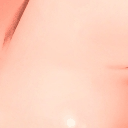

In [52]:

def prepare_single_video(frames):
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    # Pad shorter videos.
    if len(frames) < MAX_SEQ_LENGTH:
        diff = MAX_SEQ_LENGTH - len(frames)
        padding = np.zeros((diff, IMG_SIZE, IMG_SIZE, 3))
        frames = np.concatenate(frames, padding)

    frames = frames[None, ...]

    # Extract features from the frames of the current video.
    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            if np.mean(batch[j, :]) > 0.0:
                frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
            else:
                frame_features[i, j, :] = 0.0

    return frame_features


def predict_action(path):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join( images_path + "test", str(path) + ".jpg"))
    frame_features = prepare_single_video(frames)
    probabilities = trained_model.predict(frame_features)[0]

    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
    return frames


# This utility is for visualization.
# Referenced from:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=10)
    return embed.embed_file("animation.gif")


test_video = np.random.choice(test_df["image_name"].values.tolist())
print(f"Test video path: {test_video}")
test_frames = predict_action(test_video)
to_gif(test_frames[:MAX_SEQ_LENGTH])

The performance of our model is far from optimal, because it was trained on a
small dataset.